## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Raw Data

In [ ]:
df = pd.read_csv("/content/plastics.csv")

In [ ]:
df.head(5)

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,0.0,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
1,Argentina,2019,Unbranded,0.0,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4,243.0
2,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0
3,Argentina,2019,Secco,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0
4,Argentina,2019,Doble Cola,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0


In [ ]:
# Checking number of null values in the dataset.
df.isnull().sum()

country              0
year                 0
parent_company      51
empty             3243
hdpe              1646
ldpe              2077
o                  267
pet                214
pp                1496
ps                1972
pvc               4328
grand_total         14
num_events           0
volunteers         107
dtype: int64

<Axes: >

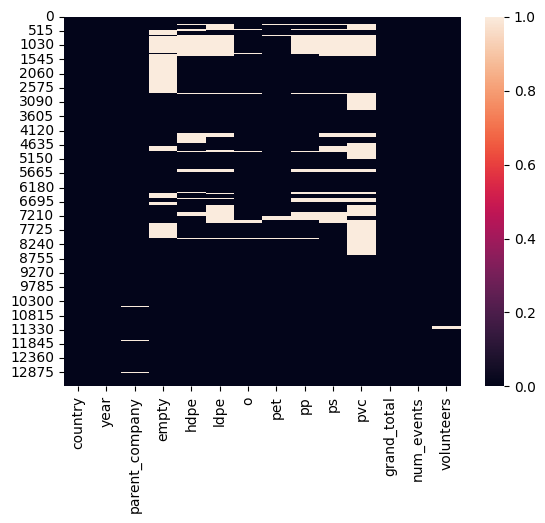

In [ ]:
# HeatMap of Null Values
sns.heatmap(df.isnull())

## Data Cleaning and Processing

In [ ]:
df['country'].value_counts()

EMPTY                       1346
United States of America     959
Indonesia                    930
China                        838
Philippines                  831
                            ... 
United Arab Emirates           4
Cote D_ivoire                  2
Luxembourg                     2
Honduras                       2
Armenia                        2
Name: country, Length: 69, dtype: int64

In [ ]:
df.drop(df[df['country'] == 'EMPTY'].index, inplace= True)

In [ ]:
df.dropna(subset=['parent_company'],inplace=True)

In [ ]:
df.drop(columns=['empty'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

country              0
year                 0
parent_company       0
hdpe              1646
ldpe              2077
o                  267
pet                214
pp                1496
ps                1972
pvc               4328
grand_total         14
num_events           0
volunteers         106
dtype: int64

In [ ]:
df.dropna(subset=['hdpe','ldpe','o','pet','pp','ps','pvc','grand_total','volunteers'],inplace=True)

In [ ]:
df.isnull().sum()

country           0
year              0
parent_company    0
hdpe              0
ldpe              0
o                 0
pet               0
pp                0
ps                0
pvc               0
grand_total       0
num_events        0
volunteers        0
dtype: int64

In [ ]:
df = df.loc[df.grand_total !=0]
df = df.loc[(df.parent_company != 'Unbranded') & (df.parent_company != 'Grand Total')]

In [ ]:
df.to_csv("Cleaned_Data_Plastic.csv", sep=',', index=False, encoding='utf-8')

## EDA of Data

**Variables**

Country --> Country of Cleanup

Year --> 2019 or 2020

Parent Company --> Source of Plastic

hdpe --> High density polyethylene count (Plastic milk containers, plastic bags, bottle caps, trash cans, oil cans, plastic lumber, toolboxes, supplement containers)

lpde --> Low density polyethylene count (Plastic bags, Ziploc bags, buckets, squeeze bottles, plastic tubes, chopping boards)

o --> Category marked other count

pet --> Polyester plastic count (Polyester fibers, soft drink bottles, food containers (also see plastic bottles))

pp --> Polypropylene count (Flower pots, bumpers, car interior trim, industrial fibers, carry-out beverage cups, microwavable food containers, DVD keep cases)

ps --> Polystyrene count (Toys, video cassettes, ashtrays, trunks, beverage/food coolers, beer cups, wine and champagne cups, carry-out food containers, Styrofoam)

pvc --> PVC plastic count (Window frames, bottles for chemicals, flooring, plumbing pipes)

grand_total --> Grand total count (all types of plastic)

num_events --> Number of counting events

volunteers --> Number of volunteers

In [ ]:
df = pd.read_csv("/content/Cleaned_Data_Plastic.csv")

In [ ]:
df['country'] = df['country'].str.title()
df.head(5)

,country,year,parent_company,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
1,Argentina,2019,Unbranded,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4,243.0
2,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0
3,Argentina,2019,Secco,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0
4,Argentina,2019,Doble Cola,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0


### Source of Plastic Country-wise from 2019 to 2020

In [ ]:
result_df = pd.merge(df,
                     df.groupby(['country','year'])['grand_total'].sum().reset_index().rename(columns = {'grand_total' : 'country_total'}),
                     on=['country','year'])
result_df.head(5)

,country,year,parent_company,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers,country_total
0,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0,830.0
1,Argentina,2019,Secco,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0,830.0
2,Argentina,2019,Doble Cola,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0,830.0
3,Argentina,2019,Pritty,0.0,0.0,0.0,22.0,7.0,0.0,0.0,29.0,4,243.0,830.0
4,Argentina,2019,PepsiCo,0.0,0.0,0.0,21.0,6.0,0.0,0.0,27.0,4,243.0,830.0


In [ ]:
# Top Plastic Producing Countries
countries_lst = ['Vietnam','Nigeria','Philippines', 'India', 'Indonesia']

<Axes: ylabel='country'>

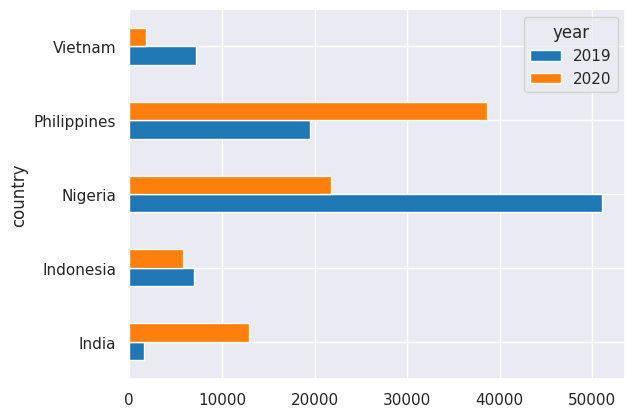

In [ ]:
part1_df = result_df[result_df['country'].isin(countries_lst)][['country','year','Year_Total']].drop_duplicates()
part1_df.sort_values(['Year_Total','country','year'], ascending=False)

part1_df = part1_df.groupby(['country','year']).sum().reset_index()
part1_df = part1_df.pivot_table(index='country',columns='year', values = 'Year_Total', aggfunc = 'sum', fill_value = 0)
part1_df.plot(kind='barh',stacked=False)

### Which Type Plastic is produced by a particular company

In [ ]:
df['parent_company'].value_counts()[:6] #Top companies we'll be targetting.

The Coca-Cola Company     58
Unilever                  43
Mondelez International    41
Pepsico                   40
Mars, Incorporated        38
Nestle                    36
Name: parent_company, dtype: int64

In [ ]:
company_list = ["The Coca-Cola Company", "Unilever","Mondelez International","Pepsico","Mars, Incorporated"]

In [ ]:
part2_df = df[df['parent_company'].isin(company_list)][['parent_company','hdpe','ldpe','pet','pp','ps','pvc']]
part2_df = part2_df.groupby(['parent_company']).sum().reset_index()
part2_df.head(5)

,parent_company,hdpe,ldpe,pet,pp,ps,pvc
0,"Mars, Incorporated",23.0,199.0,82.0,105.0,0.0,8.0
1,Mondelez International,10.0,428.0,119.0,400.0,3.0,7.0
2,Pepsico,274.0,240.0,3372.0,531.0,10.0,42.0
3,The Coca-Cola Company,1449.0,419.0,17094.0,1029.0,51.0,49.0
4,Unilever,345.0,1079.0,437.0,3154.0,3.0,19.0


In [ ]:
part2_df = part2_df.pivot_table(index='parent_company', values = ['hdpe','ldpe','pet','pp','ps','pvc'], aggfunc = 'sum', fill_value = 0)
part2_df.head(5)

,hdpe,ldpe,pet,pp,ps,pvc
parent_company,,,,,,
"Mars, Incorporated",23,199,82,105,0,8
Mondelez International,10,428,119,400,3,7
Pepsico,274,240,3372,531,10,42
The Coca-Cola Company,1449,419,17094,1029,51,49
Unilever,345,1079,437,3154,3,19


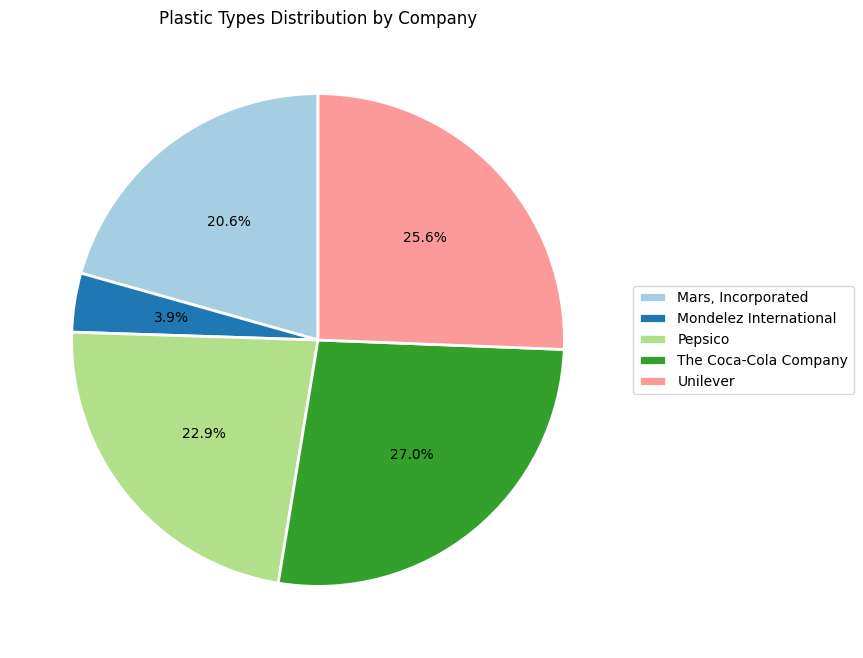

In [ ]:
import matplotlib.pyplot as plt

# Assuming part2_df is the DataFrame obtained from the provided code
# If not, make sure to use the correct DataFrame

# Calculate the total count for each company
part2_df['total'] = part2_df.sum(axis=1)

# Create a new DataFrame for percentage values
percentage_df = part2_df.div(part2_df['total'], axis=0) * 100

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(part2_df)))

# Use wedgeprops to set the edgecolor to white
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

# Plot the pie chart without labels
ax.pie(percentage_df['hdpe'], labels=None, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=wedgeprops)

# Add legend
ax.legend(part2_df.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Set a title
ax.set_title('Plastic Types Distribution by Company')

plt.show()

### Which companies are producing the most amount of plastic in 2019 and 2020

In [ ]:
plastic_sum = df.groupby(['parent_company', 'year'])[['grand_total']].sum().reset_index()

sorted_plastic = plastic_sum.sort_values(by='grand_total', ascending=False)

# Display the top companies for each year
top_companies_2019 = sorted_plastic[sorted_plastic['year'] == 2019].head(5)
top_companies_2020 = sorted_plastic[sorted_plastic['year'] == 2020].head(5)

# Display the results
print("Top companies producing the most plastic in 2019:")
print(top_companies_2019[['parent_company', 'grand_total']])
print("\nTop companies producing the most plastic in 2020:")
print(top_companies_2020[['parent_company', 'grand_total']])

Top companies producing the most plastic in 2019:
             parent_company  grand_total
2052            Grand Total     159896.0
5441              Unbranded      61799.0
2833                 La Doo      15221.0
5200  The Coca-Cola Company       6840.0
516                   Barna       6225.0

Top companies producing the most plastic in 2020:
                    parent_company  grand_total
5442                     Unbranded     113062.0
5201         The Coca-Cola Company      13814.0
3539                        Nestle       8642.0
5485  Universal Robina Corporation       6408.0
1064             Colgate-Palmolive       5911.0


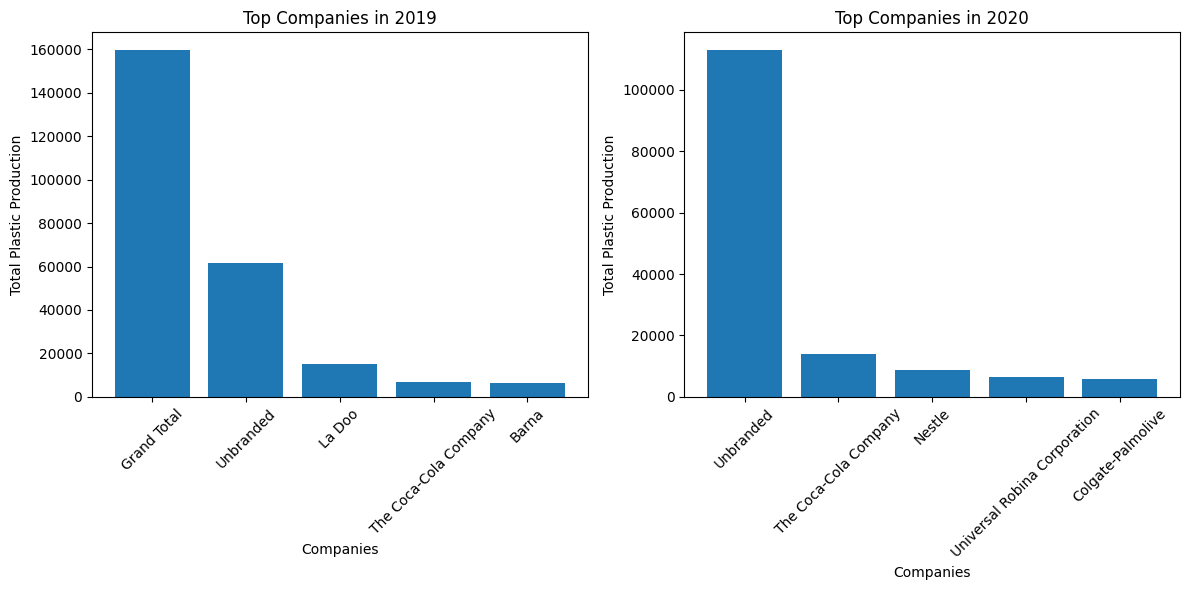

In [ ]:
# Get the top companies for each year
top_companies_2019 = sorted_plastic[sorted_plastic['year'] == 2019].head(5)
top_companies_2020 = sorted_plastic[sorted_plastic['year'] == 2020].head(5)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for 2019
axes[0].bar(top_companies_2019['parent_company'], top_companies_2019['grand_total'])
axes[0].set_title('Top Companies in 2019')
axes[0].set_xlabel('Companies')
axes[0].set_ylabel('Total Plastic Production')

# Plot for 2020
axes[1].bar(top_companies_2020['parent_company'], top_companies_2020['grand_total'])
axes[1].set_title('Top Companies in 2020')
axes[1].set_xlabel('Companies')
axes[1].set_ylabel('Total Plastic Production')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Companies that high have amount of plastic but lowest volunteers

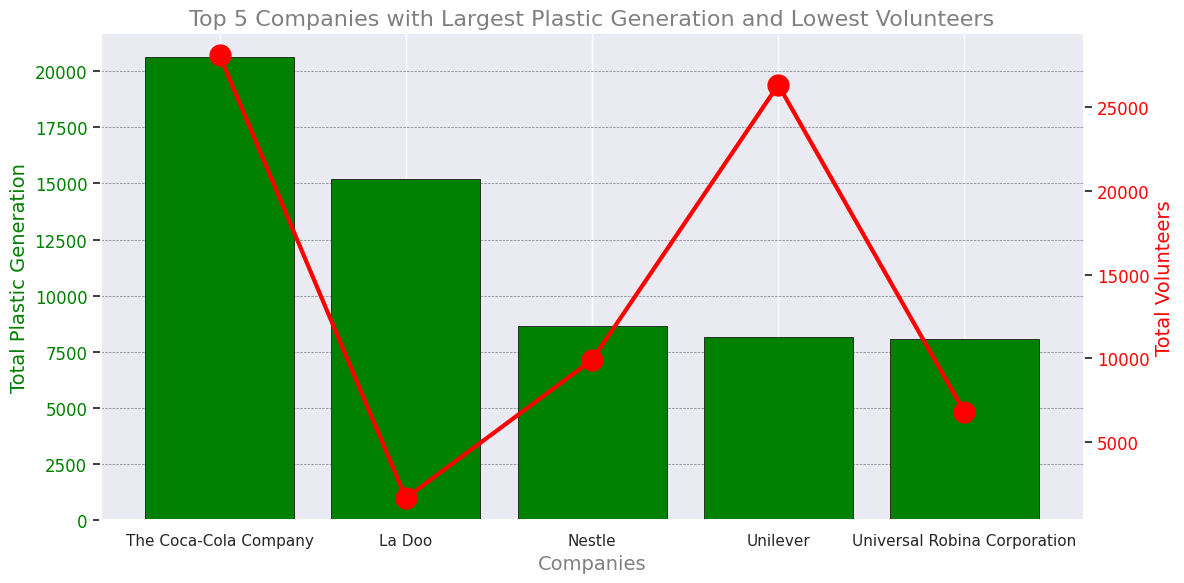

In [ ]:
# Assuming your DataFrame is named df
df['total_generation'] = df.groupby('parent_company')['grand_total'].transform('sum')
df['total_volunteers'] = df.groupby('parent_company')['volunteers'].transform('sum')

# Get the unique companies
unique_companies = df[['parent_company', 'total_generation', 'total_volunteers']].drop_duplicates()

# Sort by total_generation in descending order and total_volunteers in ascending order
sorted_companies = unique_companies.sort_values(by=['total_generation', 'total_volunteers'], ascending=[False, True])

# Get the top 5 companies
top_5_companies = sorted_companies.head(5)

# Set a Seaborn dark style with a custom color palette
sns.set(style="darkgrid", palette=sns.color_palette("tab10", 10))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total generation
ax1.bar(top_5_companies['parent_company'], top_5_companies['total_generation'], label='Total Generation', color = 'g', edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Companies', fontsize=14, color = 'gray')
ax1.set_ylabel('Total Plastic Generation', fontsize=14, color = 'g')
ax1.tick_params(axis='y', labelcolor='g', labelsize=12)

# Create a second y-axis to plot total volunteers
ax2 = ax1.twinx()
ax2.plot(top_5_companies['parent_company'], top_5_companies['total_volunteers'], marker='o', color = 'r', label='Total Volunteers', linewidth=3, markersize=15)
ax2.set_ylabel('Total Volunteers', fontsize=14, color = 'r')
ax2.tick_params(axis='y', labelcolor='r', labelsize=12)

# Title and legend
plt.title('Top 5 Companies with Largest Plastic Generation and Lowest Volunteers', fontsize=16, color='gray')
fig.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines to y-axis for better visibility
ax1.yaxis.grid(color='gray', linestyle='dashed', linewidth=0.5)
ax2.yaxis.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Trend of volunteers from 2019 to 2020 per country (top 5 countries form plot 1 can be taken)

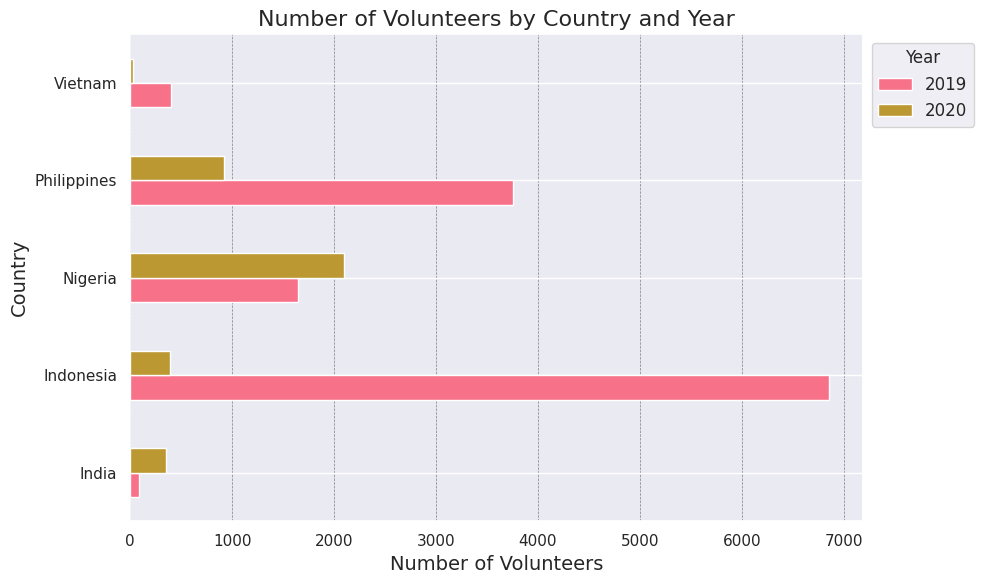

In [ ]:
vol = df[df['country'].isin(countries_lst)][['country','year','volunteers']].drop_duplicates()
vol.sort_values(['volunteers','country','year'], ascending=False)

# Group by country and year, sum the volunteers, and pivot the table
vol = vol.groupby(['country', 'year']).sum().reset_index()
vol = vol.pivot_table(index='country', columns='year', values='volunteers', aggfunc='sum', fill_value=0)

# Set a Seaborn dark style with color palette
sns.set(style="darkgrid", palette="husl")

# Plot the bar graph
ax = vol.plot(kind='barh', stacked=False, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Number of Volunteers', fontsize=14)
ax.set_ylabel('Country', fontsize=14)
ax.set_title('Number of Volunteers by Country and Year', fontsize=16)

# Customize legend
ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add grid lines for better visibility
ax.xaxis.grid(color='gray', linestyle='dashed', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### In the top 5 countries which generated the most plastic from 2019 and 2020, what type of plastic was prominent

In [ ]:
# filtering list to specific countries and only companies with production of plastic.

filtered_df = df[df['country'].isin(countries_lst)]
filtered_df = filtered_df[filtered_df['grand_total'] != 0.0]

#### 2019

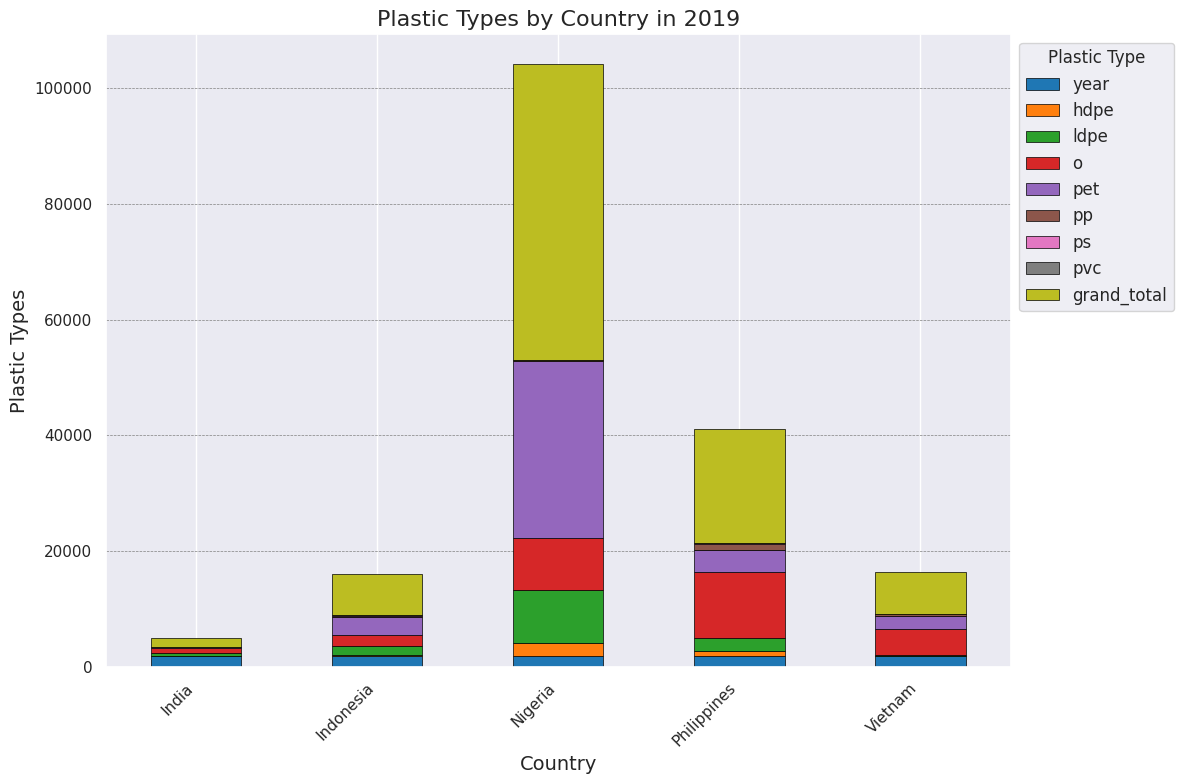

In [ ]:
# Get the top companies for each year
top_companies_2019 = filtered_df[filtered_df['year'] == 2019]

top_companies_2019 = top_companies_2019.groupby(['country', 'year']).agg({
    'hdpe': 'sum',
    'ldpe': 'sum',
    'o': 'sum',
    'pet': 'sum',
    'pp': 'sum',
    'ps': 'sum',
    'pvc': 'sum',
    'grand_total': 'sum'
}).reset_index()

# Display the new DataFrame
top_companies_2019.sort_values(['grand_total'], ascending = False)

top_companies_2019.set_index(['country'], inplace=True)

# Set a Seaborn dark style with a custom color palette
sns.set(style="darkgrid", palette=sns.color_palette("tab10", 10))

# Plot the stacked bar plot
ax = top_companies_2019.plot(kind='bar', stacked=True, figsize=(12, 8), edgecolor='black', linewidth=0.5)

# Set labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Plastic Types', fontsize=14)
ax.set_title('Plastic Types by Country in 2019', fontsize=16)

# Customize legend
ax.legend(title='Plastic Type', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines to y-axis for better visibility
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### 2020

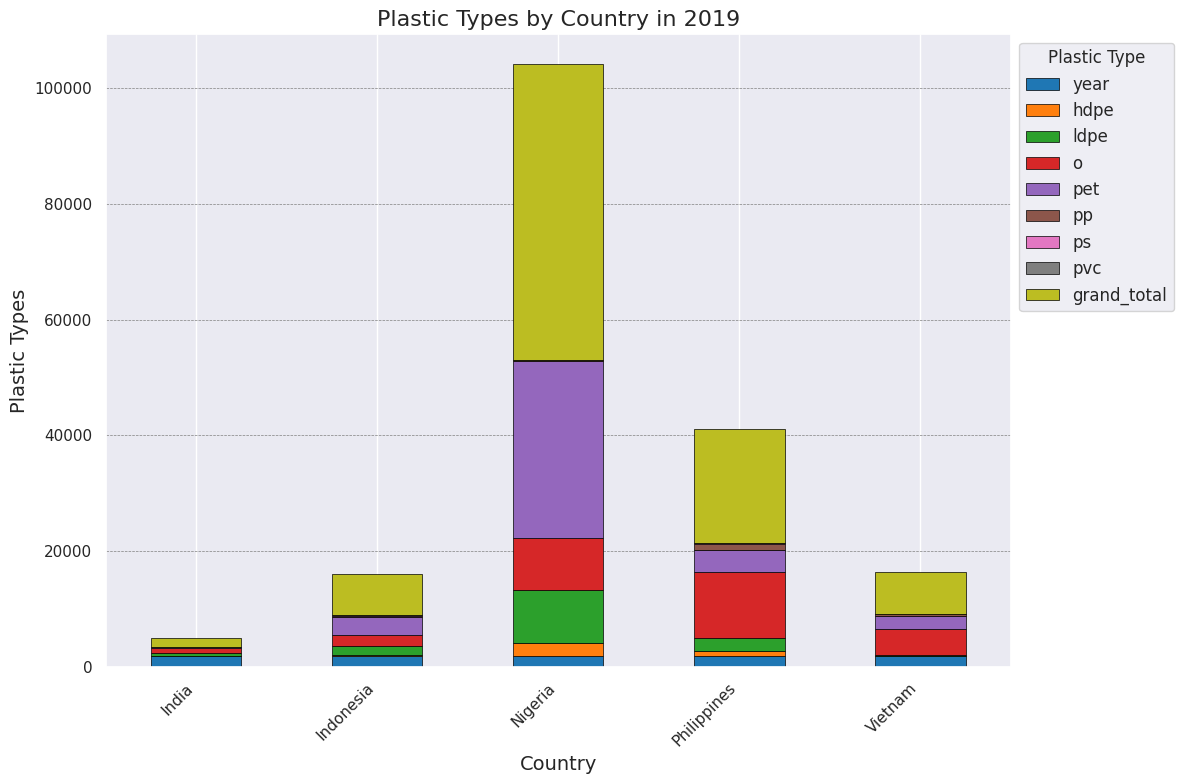

In [ ]:
# Get the top companies for each year
top_companies_2020 = filtered_df[filtered_df['year'] == 2020]

top_companies_2020 = top_companies_2020.groupby(['country', 'year']).agg({
    'hdpe': 'sum',
    'ldpe': 'sum',
    'o': 'sum',
    'pet': 'sum',
    'pp': 'sum',
    'ps': 'sum',
    'pvc': 'sum',
    'grand_total': 'sum'
}).reset_index()

top_companies_2020.sort_values(['grand_total'], ascending = False)

top_companies_2020.set_index(['country'], inplace=True)

# Set a Seaborn dark style with a custom color palette
sns.set(style="darkgrid", palette=sns.color_palette("tab10", 10))

# Plot the stacked bar plot
ax = top_companies_2019.plot(kind='bar', stacked=True, figsize=(12, 8), edgecolor='black', linewidth=0.5)

# Set labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Plastic Types', fontsize=14)
ax.set_title('Plastic Types by Country in 2019', fontsize=16)

# Customize legend
ax.legend(title='Plastic Type', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines to y-axis for better visibility
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()